In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import tensorflow as tf

### Load validation set in tensorflow format

In [6]:
def load_dataset(path):
    data = pd.read_pickle(path)
    n_features = data['clip_features'][0].shape[-1]
    class_names = data['y'].unique()
    y = np.array([np.where(class_names == e)[0][0] for e in data['y']])
    x = np.concatenate(data['clip_features'].to_numpy())
    print(f'Loaded {len(x)} instances from {path}.')
    print(f'X shape {x.shape} and y shape {y.shape} with labels:\n{data["y"].value_counts()}.')
    train_ds = tf.data.Dataset.from_tensor_slices((x, y)).batch(16)
    return train_ds, class_names, n_features, data['paths']


validation_ds, class_names, n_features, paths = load_dataset('../robot_or_brain_combined_data/test.pk')

Loaded 1248 instances from ../robot_or_brain_combined_data/test.pk.
X shape (1248, 512) and y shape (1248,) with labels:
y
None of the above                  443
Acting or Performing machine       281
Collaborative or Interactive AI    182
Thinking machine                   156
Complex AI                         145
Mysterious AI                       21
Superior human                      14
Learning or recognition machine      6
Name: count, dtype: int64.


In [7]:
class_list = class_names

In [8]:
trues = [class_list[int(y)] for _x, y in validation_ds.unbatch()]

### Print class counts for each split

In [9]:
df([y for y in trues]).value_counts()

None of the above                  443
Acting or Performing machine       281
Collaborative or Interactive AI    182
Thinking machine                   156
Complex AI                         145
Mysterious AI                       21
Superior human                      14
Learning or recognition machine      6
Name: count, dtype: int64

Some of these counts are horrible. The number of examples in 'Learning or recognition machine', 'Superior human' and 'Mysterious AI' are really too small. Also, the 'None of the above' class is very large, although that's not really a problem.

### Load our trained model

In [10]:
import tensorflow as tf

# model = tf.keras.models.load_model('./fine_tuned_model_3m6herki')
# model = tf.keras.models.load_model('./fine_tuned_model_3f0vzk68')
# model = tf.keras.models.load_model('./fine_tuned_model_qdesgan9')
# model = tf.keras.models.load_model('./clip_features_model_kuw3ehqp')
model = tf.keras.models.load_model('./clip_features_model_kf5cnvvi')

### Make predictions

In [11]:
logits = model.predict(validation_ds)
predicted = [class_list[v] for v in np.argmax(logits, 1)]
from pandas import DataFrame as df

print(df(predicted).value_counts())
print(df(trues).value_counts())

78/78 [==============================] - 0s 1ms/step
None of the above                  592
Acting or Performing machine       187
Thinking machine                   163
Collaborative or Interactive AI    153
Complex AI                         129
Superior human                      17
Mysterious AI                        7
Name: count, dtype: int64
None of the above                  443
Acting or Performing machine       281
Collaborative or Interactive AI    182
Thinking machine                   156
Complex AI                         145
Mysterious AI                       21
Superior human                      14
Learning or recognition machine      6
Name: count, dtype: int64


### Performance metrics for CLIP features based classifier

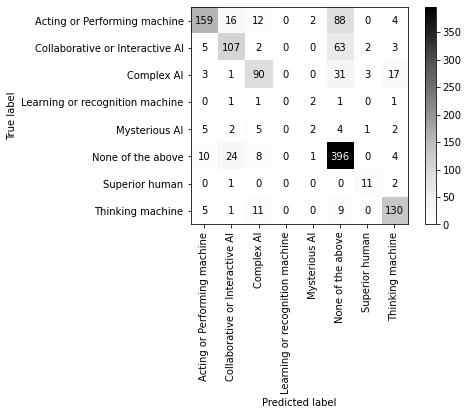

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion = confusion_matrix(trues, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=class_list)
_ = disp.plot(cmap='Greys', xticks_rotation='vertical')


In [9]:
from utils import display_performance_metrics

display_performance_metrics(trues, predicted, list(class_list))

C:\Users\ChristiaanMeijer\anaconda3\envs\robot\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,recall,precision,f1
Acting or Performing machine,0.57,0.85,0.68
Collaborative or Interactive AI,0.59,0.70,0.64
Complex AI,0.62,0.70,0.66
Learning or recognition machine,0.00,0.00,0.00
Mysterious AI,0.10,0.29,0.14
None of the above,0.89,0.67,0.77
Superior human,0.79,0.65,0.71
Thinking machine,0.83,0.80,0.82


,score
accuracy,0.72
krippendorff alpha,0.62


# Print predictions along with the paths of the original image file

In [18]:
print('prediction;path;file_name')
for prediction, path in zip(predicted, paths):
    print(f'{prediction};{path};{path.name}')

prediction;path;file_name
None of the above;..\robot_or_brain_combined_data\images_by_class\test\Acting or Performing machine\1001.jpg;1001.jpg
None of the above;..\robot_or_brain_combined_data\images_by_class\test\Acting or Performing machine\101.jpg;101.jpg
None of the above;..\robot_or_brain_combined_data\images_by_class\test\Acting or Performing machine\1014.jpg;1014.jpg
Acting or Performing machine;..\robot_or_brain_combined_data\images_by_class\test\Acting or Performing machine\102.jpg;102.jpg
Complex AI;..\robot_or_brain_combined_data\images_by_class\test\Acting or Performing machine\1032.jpg;1032.jpg
Acting or Performing machine;..\robot_or_brain_combined_data\images_by_class\test\Acting or Performing machine\105.jpg;105.jpg
None of the above;..\robot_or_brain_combined_data\images_by_class\test\Acting or Performing machine\1096.jpg;1096.jpg
Acting or Performing machine;..\robot_or_brain_combined_data\images_by_class\test\Acting or Performing machine\1104.jpg;1104.jpg
None of th